In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
plt.style.use('seaborn-pastel')

In [2]:
dfx = pd.read_csv('xdata.csv')
dfy = pd.read_csv('ydata.csv')

In [3]:
# convert data into a numpy array

X = dfx.values
Y = dfy.values



print(X.shape)
print(Y.shape)

(399, 3)
(399, 2)


In [5]:
print(X) # column 1 is just serial number so we'll discard it 


[[ 1.00000000e+00  3.51627900e+00  3.71975047e+00]
 [ 2.00000000e+00  4.60649561e+00  3.41437943e+00]
 [ 3.00000000e+00  4.67701056e+00  3.04724443e+00]
 ...
 [ 3.97000000e+02  7.89625683e-01  9.31669806e-01]
 [ 3.98000000e+02 -1.00253042e+00 -6.76162472e-01]
 [ 3.99000000e+02  2.92386778e-01  5.61177823e-01]]


In [13]:
X = dfx.values
Y = dfy.values


X = X[:,1:] # dropped 1st column 
Y = Y[:,1:].reshape((-1,))

print(X.shape)
print(Y.shape)

# print(Y) -->> one is class o and other is 1 

(399, 2)
(399,)


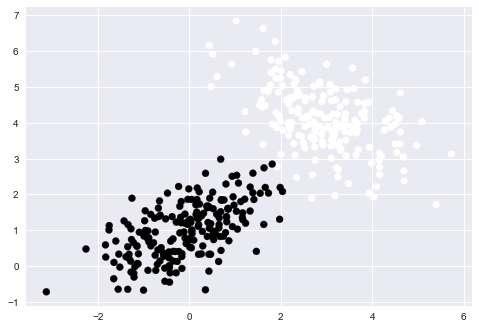

In [19]:
plt.scatter(X[:,0], X[:,1], c=Y) # for all rows i need oth and 1st column # defined color using Y array
plt.show()

Now we want to generate one query point and we'll try to make predictions for that point

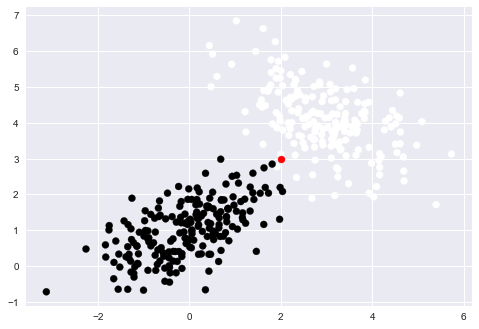

In [21]:
query_x = np.array([2,3])
plt.scatter(X[:,0], X[:,1], c=Y)
plt.scatter(query_x[0],query_x[1],color = 'red') # We want to predict about this point whether it belongs to class 0 or 1 
plt.show() 

Define Eucledian distance function

In [22]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

Define KNN function

In [37]:
def knn(X,Y,queryPoint,k=5): # k is how many neighbours i want to consider
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d, Y[i])) # we are going to append two things 1st is distance and 2nd is label # dist is at 1st coz sorting based on this 
    
    #sorting
    vals  = sorted(vals)
    
    #Nearest k points
    vals = vals[:k] #discard points which are after k 
    
    vals = np.array(vals) # convert to numpy array  
    
    #print(vals)
    
    # we do not need distance now
    new_vals = np.unique(vals[:,1], return_counts = True)
    print(new_vals)
    
    max_freq_index = new_vals[1].argmax()
    
    prediction = new_vals[0][max_freq_index]
    
    return prediction

In [39]:
x = knn(X,Y,query_x) # array[0.,1.] is labels and array[3,2] is frequency

print(x)

(array([0., 1.]), array([3, 2], dtype=int64))
0.0


In [ ]:
# use np.argmax() it will give us the index of max frequency

In [42]:
# test model 

x = knn(X,Y,[0,0])
print(x)

(array([1.]), array([5], dtype=int64))
1.0
